# Logisitic Regression

* Logistic Regression is a classification algorithm used to predict the probability of a binary outcome (e.g., yes/no, 0/1). It uses the sigmoid function to map predicted values to probabilities. 

* Uses sigmoid function

* Uses binary Cross-Entropy as loss function

In [1]:
import numpy as np

In [8]:
class LogisticRegression:

    def __init__(self, lr=0.01, n_iters=1000):
        """
        Constructor for Logistic Regression.
        :param learning_rate: Learning rate for gradient descent.
        :param n_iters: Number of iterations for gradient descent.
        """

        self.lr = lr 
        self.n_iters = n_iters
        self.w = None 
        self.b = None 

    def sigmoid(self, z):
        """
        Sigmoid function.
        :param z: Linear combination of weights and inputs.
        :return: Sigmoid of z.
        """
        return 1/(1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Train the logistic regression model.
        :param X: Input features (n_samples, n_features).
        :param y: Target labels (n_samples,).
        """
        n_samples, n_features = X.shape

        # initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # gradient descent
        for _ in range(self.n_iters):
            # linear combination of weight and inputs 
            z = np.dot(X, self.w) + self.b 

            # predicted probabilities 
            y_pred = self.sigmoid(z)

            # compute gradients 
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # update weights and biases 
            self.w -= self.lr * dw 
            self.b -= self.lr * db 
            
             
    def predict(self, X, threshold=0.5):
        """
        Make predictions.
        :param X: Input features (n_samples, n_features).
        :param threshold: Threshold for binary classification.
        :return: Predicted labels (0 or 1).
        """

        z = np.dot(X, self.w) + self.b 
        y_pred = self.sigmoid(z) 
        return (y_pred > threshold).astype(int)

    def loss(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss.
        :param y_true: True labels.
        :param y_pred: Predicted probabilities.
        :return: Loss value.
        """
        epsilon = 1e-15 # to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # clip predictions to avoid log(0)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_pred) * np.log(1 - y_pred))

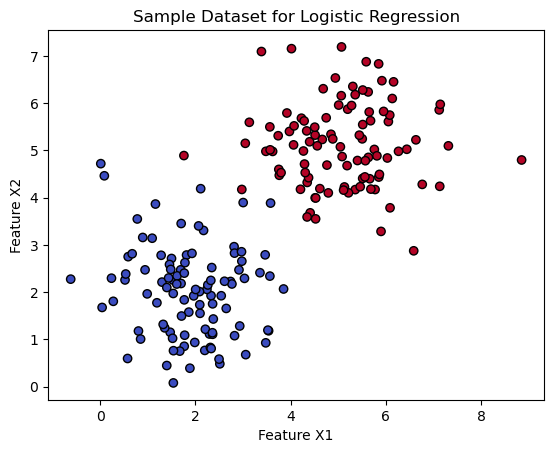

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for two features (X1, X2)
n_samples = 100
X1_class0 = np.random.normal(loc=2, scale=1, size=n_samples)  # Class 0
X2_class0 = np.random.normal(loc=2, scale=1, size=n_samples)  # Class 0
X1_class1 = np.random.normal(loc=5, scale=1, size=n_samples)  # Class 1
X2_class1 = np.random.normal(loc=5, scale=1, size=n_samples)  # Class 1

# Combine features into a single dataset
X = np.vstack((np.column_stack((X1_class0, X2_class0)), np.column_stack((X1_class1, X2_class1))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))  # Labels (0 for class 0, 1 for class 1)

# Shuffle the dataset
shuffle_idx = np.random.permutation(2 * n_samples)
X = X[shuffle_idx]
y = y[shuffle_idx]

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Sample Dataset for Logistic Regression")
plt.show()

Accuracy: 0.99


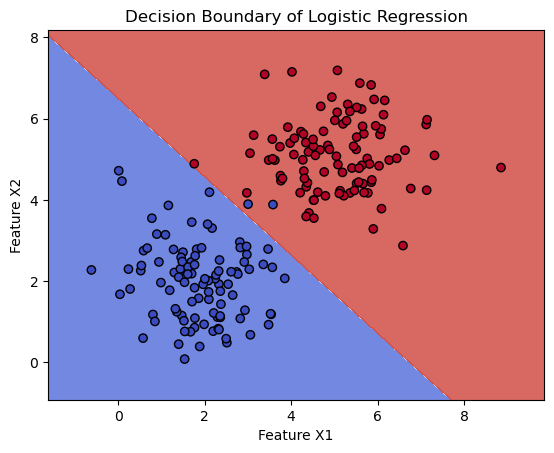

In [10]:
# Create and train the model
model = LogisticRegression(lr=0.1, n_iters=1000)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Compute accuracy
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature X1")
    plt.ylabel("Feature X2")
    plt.title("Decision Boundary of Logistic Regression")
    plt.show()

plot_decision_boundary(X, y, model)